# Homogenous Cement #2 Sample

Data collected on Jan 18, 2023. Using S-wave transducers (S2 trans and S1 rec), both P- and S- waves were recorded in same .csv file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft
exec(open('ComputeDelays.py').read())

In [2]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

In [3]:
HC8=timedata('HC8')
readlabdat('jan18_4.csv',HC8)
HC7=timedata('HC7')
readlabdat('jan18_5.csv',HC7)
HC6=timedata('HC6')
readlabdat('jan18_6.csv',HC6)
HC5=timedata('HC5')
readlabdat('jan18_7.csv',HC5)

# FFT of entire data
f_HC8,FT_HC8=myfft(HC8.time,HC8.data)
f_HC7,FT_HC7=myfft(HC7.time,HC7.data)
f_HC6,FT_HC6=myfft(HC6.time,HC6.data)
f_HC5,FT_HC5=myfft(HC5.time,HC5.data)

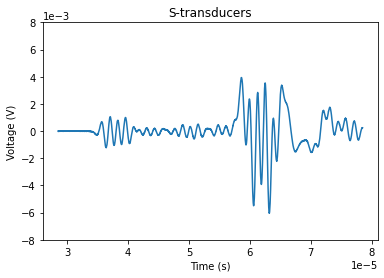

In [3]:
plt.plot(HC8.time,HC8.data+0.0029)
#plt.plot(HC7.time,HC7.data)
#plt.plot(HC6.time,HC6.data)
#plt.plot(HC5.time,HC5.data)
plt.title('S-transducers')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.ylim([-0.008,0.008])
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,-3))
plt.savefig('Figures/parasiticP.jpeg',dpi=300)


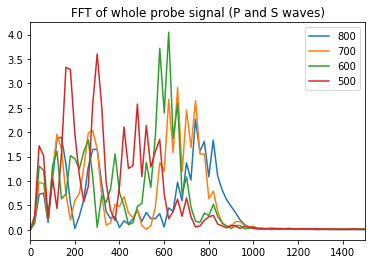

In [4]:
plt.plot(f_HC8,np.abs(FT_HC8), label='800')
plt.plot(f_HC7,np.abs(FT_HC7), label='700')
plt.plot(f_HC6,np.abs(FT_HC6), label='600')
plt.plot(f_HC5,np.abs(FT_HC5), label='500')
plt.xlim([0,1500])
plt.title('FFT of whole probe signal (P and S waves)')
plt.legend()


## Now, let's seperate the P- and S- waves and examine them seperately:

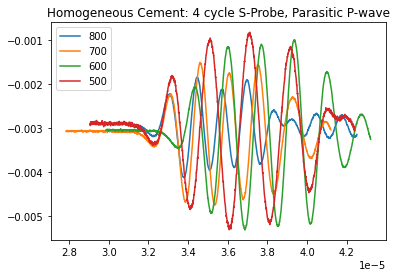

In [6]:
plt.plot(HC8.time[500:2550]-0.26e-5,
         HC8.data[500:2550], label='800')
plt.plot(HC7.time[500:2550]-0.2e-5,HC7.data[500:2550], label='700')
plt.plot(HC6.time[500:2550],HC6.data[500:2550], label='600')
plt.plot(HC5.time[500:2550],HC5.data[500:2550], label='500')
plt.title('Homogeneous Cement: 4 cycle S-Probe, Parasitic P-wave')
plt.legend()

Text(0, 0.5, 'Amplitude (V)')

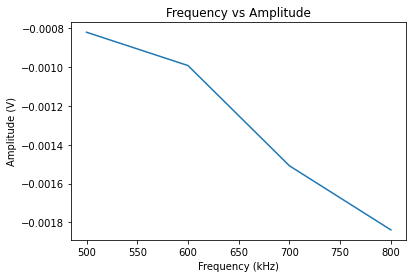

In [7]:
max_5 = np.max(HC5.data[500:2550])
max_6 = np.max(HC6.data[500:2550])
max_7 = np.max(HC7.data[500:2550])
max_8 = np.max(HC8.data[500:2550])
amps = [max_5,max_6,max_7,max_8]
freqs = [500,600,700,800] 

plt.plot(freqs,amps)
plt.title('Frequency vs Amplitude')
plt.xlabel("Frequency (kHz)")
plt.ylabel('Amplitude (V)')
#plt.legend()
#plt.text('Homogeneous Cement: 4 cycle S-Probe, Parasitic P-wave')

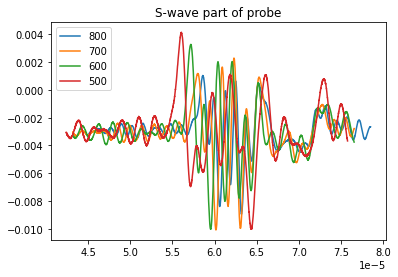

In [41]:
plt.plot(HC8.time[2550:],HC8.data[2550:], label='800')
plt.plot(HC7.time[2550:],HC7.data[2550:], label='700')
plt.plot(HC6.time[2550:],HC6.data[2550:], label='600')
plt.plot(HC5.time[2550:],HC5.data[2550:], label='500')
plt.title('S-wave part of probe')
plt.legend()

In [8]:
# FFT of P-wave part
f_HC8p,FT_HC8p=myfft(HC8.time[0:2550],HC8.data[0:2550])
f_HC7p,FT_HC7p=myfft(HC7.time[0:2550],HC7.data[0:2550])
f_HC6p,FT_HC6p=myfft(HC6.time[0:2550],HC6.data[0:2550])
f_HC5p,FT_HC5p=myfft(HC5.time[0:2550],HC5.data[0:2550])

# FFT of S-wave part
f_HC8s,FT_HC8s=myfft(HC8.time[2550:],HC8.data[2550:])
f_HC7s,FT_HC7s=myfft(HC7.time[2550:],HC7.data[2550:])
f_HC6s,FT_HC6s=myfft(HC6.time[2550:],HC6.data[2550:])
f_HC5s,FT_HC5s=myfft(HC5.time[2550:],HC5.data[2550:])

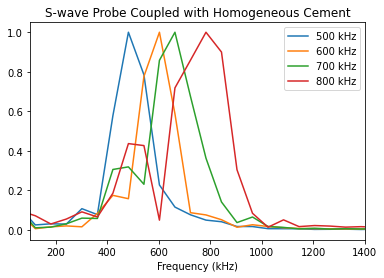

In [43]:
plt.plot(f_HC5p,np.abs(FT_HC5p)/max(np.abs(FT_HC5p)), label='500 kHz')
plt.plot(f_HC6p,np.abs(FT_HC6p)/max(np.abs(FT_HC6p)), label='600 kHz')
plt.plot(f_HC7p,np.abs(FT_HC7p)/max(np.abs(FT_HC7p)), label='700 kHz')
plt.plot(f_HC8p,np.abs(FT_HC8p)/max(np.abs(FT_HC8p)), label='800 kHz')

plt.xlim([100,1400])
plt.title('S-wave Probe Coupled with Homogeneous Cement')
plt.legend()
plt.xlabel("Frequency (kHz)")
plt.savefig('HomoCem_Strans_Ppart_FFT_noAmp.jpeg',dpi=300)

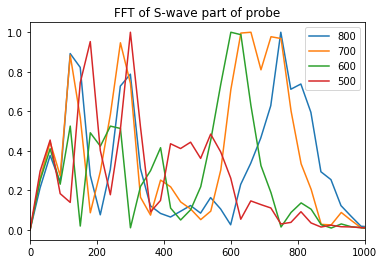

In [25]:
plt.plot(f_HC8s,np.abs(FT_HC8s)/max(np.abs(FT_HC8s)), label='800')
plt.plot(f_HC7s,np.abs(FT_HC7s)/max(np.abs(FT_HC7s)), label='700')
plt.plot(f_HC6s,np.abs(FT_HC6s)/max(np.abs(FT_HC6s)), label='600')
plt.plot(f_HC5s,np.abs(FT_HC5s)/max(np.abs(FT_HC5s)), label='500')
plt.xlim([0,1000])
plt.title('FFT of S-wave part of probe')
plt.legend()
plt.savefig('HomoCem_Strans_Spart_FFT.jpeg',dpi=300)

# Manual vs python data collected Jan 27

Text(0.5, 1.0, 'FFT of 800 kHz probe (P part of S-wave probe): comparing manually collected to python collected')

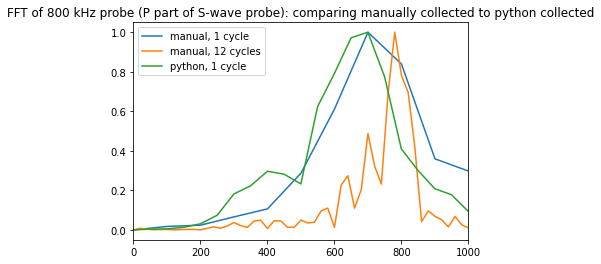

In [5]:
pr_12cyc=timedata('pr_12cyc')
readlabdat('jan27_3.csv',pr_12cyc)

pr_1cyc=timedata('pr_1cyc')       # p-wave part only
readlabdat('jan27_5.csv',pr_1cyc)

HoCempr20=timedata('HoCempr20')
readlabdat('HoCempr20.csv',HoCempr20)

# FFT of entire data
f_pr_12cyc,FT_pr_12cyc=myfft(pr_12cyc.time,pr_12cyc.data)
f_pr_1cyc,FT_pr_1cyc=myfft(pr_1cyc.time,pr_1cyc.data)
f_HoCempr20,FT_HoCempr20=myfft(HoCempr20.time,HoCempr20.data)

plt.plot(f_pr_1cyc,np.abs(FT_pr_1cyc)/max(np.abs(FT_pr_1cyc)), label='manual, 1 cycle')
plt.plot(f_pr_12cyc,np.abs(FT_pr_12cyc)/max(np.abs(FT_pr_12cyc)), label='manual, 12 cycles')
plt.plot(f_HoCempr20,np.abs(FT_HoCempr20)/max(np.abs(FT_HoCempr20)), label='python, 1 cycle')
plt.xlim([0,1000])
plt.legend()
plt.title('FFT of 800 kHz probe (P part of S-wave probe): comparing manually collected to python collected')


# Homogeneous Cement, S-wave probe with Amplification

In [4]:
# S1 trans, S2 rec

# P-part of Amplified S-wave Probe
HCa10=timedata('HCa10')
readlabdat('feb9_51.csv',HCa10)
HCa9=timedata('HCa9')
readlabdat('feb9_53.csv',HCa9)
HCa8=timedata('HCa8')
readlabdat('feb9_55.csv',HCa8)
HCa7=timedata('HCa7')
readlabdat('feb9_57.csv',HCa7)
HCa6=timedata('HCa6')
readlabdat('feb9_59.csv',HCa6)
HCa5=timedata('HCa5')
readlabdat('feb9_61.csv',HCa5)
HCa4=timedata('HCa4')
readlabdat('feb9_63.csv',HCa4)
HCa3=timedata('HCa3')
readlabdat('feb9_66.csv',HCa3)
HCa2=timedata('HCa2')
readlabdat('feb9_67.csv',HCa2)


# FFT of P-part
f_HCa10,FT_HCa10=myfft(HCa10.time,HCa10.data)
f_HCa9,FT_HCa9=myfft(HCa9.time,HCa9.data)
f_HCa8,FT_HCa8=myfft(HCa8.time,HCa8.data)
f_HCa7,FT_HCa7=myfft(HCa7.time,HCa7.data)
f_HCa6,FT_HCa6=myfft(HCa6.time,HCa6.data)
f_HCa5,FT_HCa5=myfft(HCa5.time,HCa5.data)
f_HCa4,FT_HCa4=myfft(HCa4.time,HCa4.data)
f_HCa3,FT_HCa3=myfft(HCa3.time,HCa3.data)
f_HCa2,FT_HCa2=myfft(HCa2.time,HCa2.data)


# S-part of Amplified S-wave Probe
HCa10s=timedata('HCa10s')
readlabdat('feb9_52.csv',HCa10s)
HCa9s=timedata('HCa9s')
readlabdat('feb9_54.csv',HCa9s)
HCa8s=timedata('HCa8s')
readlabdat('feb9_56.csv',HCa8s)
HCa7s=timedata('HCa7s')
readlabdat('feb9_58.csv',HCa7s)
HCa6s=timedata('HCa6s')
readlabdat('feb9_60.csv',HCa6s)
HCa5s=timedata('HCa5s')
readlabdat('feb9_62.csv',HCa5s)
HCa4s=timedata('HCa4s')
readlabdat('feb9_64.csv',HCa4s)
HCa3s=timedata('HCa3s')
readlabdat('feb9_65.csv',HCa3s)
HCa2s=timedata('HCa2s')
readlabdat('feb9_68.csv',HCa2s)

# FFT of S-part
f_HCa10s,FT_HCa10s=myfft(HCa10s.time,HCa10s.data)
f_HCa9s,FT_HCa9s=myfft(HCa9s.time,HCa9s.data)
f_HCa8s,FT_HCa8s=myfft(HCa8s.time,HCa8s.data)
f_HCa7s,FT_HCa7s=myfft(HCa7s.time,HCa7s.data)
f_HCa6s,FT_HCa6s=myfft(HCa6s.time,HCa6s.data)
f_HCa5s,FT_HCa5s=myfft(HCa5s.time,HCa5s.data)
f_HCa4s,FT_HCa4s=myfft(HCa4s.time,HCa4s.data)
f_HCa3s,FT_HCa3s=myfft(HCa3s.time,HCa3s.data)
f_HCa2s,FT_HCa2s=myfft(HCa2s.time,HCa2s.data)

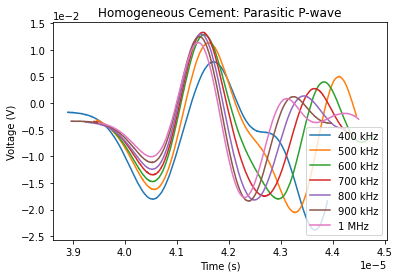

In [23]:

#plt.plot(HCa2.time,HCa2.data, label="200 kHz")
#plt.plot(HCa3.time,HCa3.data, label="300 kHz")
plt.plot(HCa4.time-0.3e-6,HCa4.data, label="400 kHz")
plt.plot(HCa5.time-0.2e-6,HCa5.data, label="500 kHz")
plt.plot(HCa6.time-0.16e-6,HCa6.data, label="600 kHz")
plt.plot(HCa7.time-0.1e-6,HCa7.data, label="700 kHz")
plt.plot(HCa8.time-0.06e-6,HCa8.data, label="800 kHz")
plt.plot(HCa9.time-0.03e-6,HCa9.data, label="900 kHz")
plt.plot(HCa10.time,HCa10.data, label="1 MHz")

plt.title('Homogeneous Cement: Parasitic P-wave')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/HomoCem_Amplified_Strans_Ppart.jpeg',dpi=300)

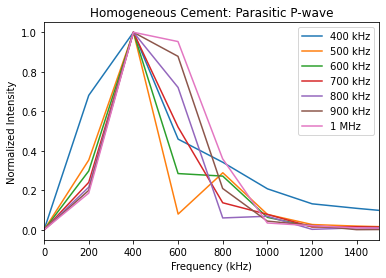

In [24]:
#plt.plot(f_HCa2,np.abs(FT_HCa2)/max(np.abs(FT_HCa2)), label='200 kHz')
#plt.plot(f_HCa3,np.abs(FT_HCa3)/max(np.abs(FT_HCa3)), label='300 kHz')
plt.plot(f_HCa4,np.abs(FT_HCa4)/max(np.abs(FT_HCa4)), label='400 kHz')
plt.plot(f_HCa5,np.abs(FT_HCa5)/max(np.abs(FT_HCa5)), label='500 kHz')
plt.plot(f_HCa6,np.abs(FT_HCa6)/max(np.abs(FT_HCa6)), label='600 kHz')
plt.plot(f_HCa7,np.abs(FT_HCa7)/max(np.abs(FT_HCa7)), label='700 kHz')
plt.plot(f_HCa8,np.abs(FT_HCa8)/max(np.abs(FT_HCa8)), label='800 kHz')
plt.plot(f_HCa9,np.abs(FT_HCa9)/max(np.abs(FT_HCa9)), label='900 kHz')
plt.plot(f_HCa10,np.abs(FT_HCa10)/max(np.abs(FT_HCa10)), label='1 MHz')




plt.xlim([0,1500])
plt.title('Homogeneous Cement: Parasitic P-wave')
plt.legend()
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensity")
plt.savefig('Figures/HomoCem_Amplified_Strans_Ppart_FFT.jpeg',dpi=300)

In [12]:
# Frequency at peak (Hz):
print(f_HCa2[np.argmax(np.abs(FT_HCa2))])
print(f_HCa3[np.argmax(np.abs(FT_HCa3))])
print(f_HCa4[np.argmax(np.abs(FT_HCa4))])
print(f_HCa5[np.argmax(np.abs(FT_HCa5))])
print(f_HCa6[np.argmax(np.abs(FT_HCa6))])
print(f_HCa7[np.argmax(np.abs(FT_HCa7))])
print(f_HCa8[np.argmax(np.abs(FT_HCa8))])
print(f_HCa9[np.argmax(np.abs(FT_HCa9))])
print(f_HCa10[np.argmax(np.abs(FT_HCa10))])



100.05002501255805
-300.3003003004558
-400.4004004006077
400.4004004006077
-400.2001000502322
-400.2001000502322
-400.2001000502322
-400.00000000020714
-400.00000000020714


In [ ]:
# df
print(f_HCa2[2]-f_HCa2[1])
print(f_HCa3[2]-f_HCa3[1])
print(f_HCa4[2]-f_HCa4[1])
print(f_HCa5[2]-f_HCa5[1])
print(f_HCa6[2]-f_HCa6[1])
print(f_HCa7[2]-f_HCa7[1])
print(f_HCa8[2]-f_HCa8[1])
print(f_HCa9[2]-f_HCa9[1])
print(f_HCa10[2]-f_HCa10[1])

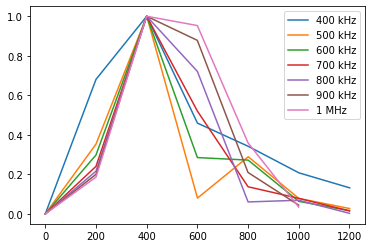

In [26]:
plt.plot(f_HCa4[999:1006],np.abs(FT_HCa4[999:1006])/max(np.abs(FT_HCa4[999:1006])), label='400 kHz')
plt.plot(f_HCa5[999:1006],np.abs(FT_HCa5[999:1006])/max(np.abs(FT_HCa5[999:1006])), label='500 kHz')
plt.plot(f_HCa6[999:1006],np.abs(FT_HCa6[999:1006])/max(np.abs(FT_HCa6[999:1006])), label='600 kHz')
plt.plot(f_HCa7[999:1006],np.abs(FT_HCa7[999:1006])/max(np.abs(FT_HCa7[999:1006])), label='700 kHz')
plt.plot(f_HCa8[999:1006],np.abs(FT_HCa8[999:1006])/max(np.abs(FT_HCa8[999:1006])), label='800 kHz')
plt.plot(f_HCa9[1000:1006],np.abs(FT_HCa9[1000:1006])/max(np.abs(FT_HCa9[1000:1006])), label='900 kHz')
plt.plot(f_HCa10[1000:1006],np.abs(FT_HCa10[1000:1006])/max(np.abs(FT_HCa10[1000:1006])), label='1 MHz')
plt.legend()

In [12]:
len(f_HCa4)/2

999.0

In [29]:
print('400kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_HCa4[999:1006],np.abs(FT_HCa4[999:1006])/max(np.abs(FT_HCa4[999:1006])))
print('500kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_HCa5[999:1006],np.abs(FT_HCa5[999:1006])/max(np.abs(FT_HCa5[999:1006])))
print('600kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_HCa6[999:1006],np.abs(FT_HCa6[999:1006])/max(np.abs(FT_HCa6[999:1006])))
print('700 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_HCa7[999:1006],np.abs(FT_HCa7[999:1006])/max(np.abs(FT_HCa7[999:1006])))
print('800 kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f_HCa8[999:1006],np.abs(FT_HCa8[999:1006])/max(np.abs(FT_HCa8[999:1006])))
print('900kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f_HCa9[1000:1005],np.abs(FT_HCa9[1000:1005])/max(np.abs(FT_HCa9[1000:1005])))
print('1000kHz')
x7,gaus7,index7, central7, fwhm7 = FWHM(f_HCa10[1000:1006],np.abs(FT_HCa10[1000:1006])/max(np.abs(FT_HCa10[1000:1006])))

400kHz
Peak Index: 33
Central Frequency: 400.4004004006077
FWHM: 497.46716413408836

500kHz
Peak Index: 30
Central Frequency: 364.00036400055245
FWHM: 254.80025480038674

600kHz
Peak Index: 33
Central Frequency: 400.2001000502322
FWHM: 315.3091697365466

700 kHz
Peak Index: 36
Central Frequency: 436.58192732752605
FWHM: 339.5637212547425

800 kHz
Peak Index: 38
Central Frequency: 460.83647884572196
FWHM: 339.5637212547425

900kHz
Peak Index: 60
Central Frequency: 484.8484848487359
FWHM: 379.79797979817647

1000kHz
Peak Index: 50
Central Frequency: 505.05050505076656
FWHM: 414.14141414162856



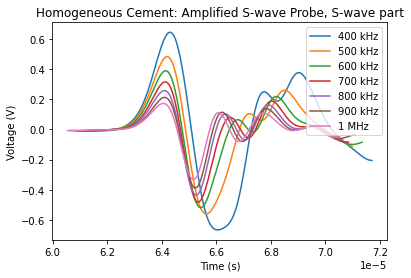

In [26]:
#plt.plot(HCa2s.time,HCa2.data, label="200 kHz")
#plt.plot(HCa3s.time,HCa3.data, label="300 kHz")
plt.plot(HCa4s.time-0.2e-6,HCa4s.data, label="400 kHz")
plt.plot(HCa5s.time-0.2e-6,HCa5s.data, label="500 kHz")
plt.plot(HCa6s.time-0.16e-6,HCa6s.data, label="600 kHz")
plt.plot(HCa7s.time-0.1e-6,HCa7s.data, label="700 kHz")
plt.plot(HCa8s.time-0.06e-6,HCa8s.data, label="800 kHz")
plt.plot(HCa9s.time,HCa9s.data, label="900 kHz")
plt.plot(HCa10s.time,HCa10s.data, label="1 MHz")

plt.title('Homogeneous Cement: Amplified S-wave Probe, S-wave part')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/HomoCem_Amplified_Strans_Spart.jpeg',dpi=300)

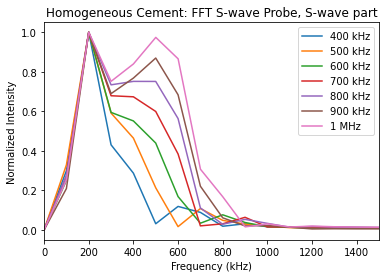

In [27]:

#plt.plot(f_HCa3s,np.abs(FT_HCa3s)/max(np.abs(FT_HCa3s)), label='300 kHz')
plt.plot(f_HCa4s,np.abs(FT_HCa4s)/max(np.abs(FT_HCa4s)), label='400 kHz')
plt.plot(f_HCa5s,np.abs(FT_HCa5s)/max(np.abs(FT_HCa5s)), label='500 kHz')
plt.plot(f_HCa6s,np.abs(FT_HCa6s)/max(np.abs(FT_HCa6s)), label='600 kHz')
plt.plot(f_HCa7s,np.abs(FT_HCa7s)/max(np.abs(FT_HCa7s)), label='700 kHz')

plt.plot(f_HCa8s,np.abs(FT_HCa8s)/max(np.abs(FT_HCa8s)), label='800 kHz')

plt.plot(f_HCa9s,np.abs(FT_HCa9s)/max(np.abs(FT_HCa9s)), label='900 kHz')

plt.plot(f_HCa10s,np.abs(FT_HCa10s)/max(np.abs(FT_HCa10s)), label='1 MHz')



#plt.plot(f_HCa2s,np.abs(FT_HCa2s)/max(np.abs(FT_HCa2s)), label='200 kHz')

plt.xlim([0,1500])
plt.title('Homogeneous Cement: FFT S-wave Probe, S-wave part')
plt.legend()
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensity")
plt.savefig('Figures/HomoCem_Amplified_Strans_Spart_FFT.jpeg',dpi=300)